### Cox-Ingressoll-Ross process for pairs trading
https://youtu.be/3906CWKhLqQ
http://pages.stern.nyu.edu/~dbackus/BCZ/discrete_time/CIR_Econometrica_85.pdf

http://dsp.vscht.cz/konference_matlab/MATLAB07/prispevky/kladivko_k/kladivko_k.pdf

https://medium.com/quantitative-investing/a-python-package-for-optimal-mean-reversion-trading-80a21814520d

Although in general it is not perfectly safe to assume that the stock price follows a mean reveting stochastic processes, the assumption is close enough.
The goal of a pairs trade is to select a pair of stocks which are either positively or negatively correlated; the purpose of this to create a beta neutral portforlio, which seeks to optimize the ratio of the weight pairs.
\begin{array}{rcl}
dX= \mu(\theta- X)dt+ \sigma dW
\end{array}
to create a beta neutral portforlio we hedge our portforlio by buying alpha shares and shorting beta shares of the positively correlated stocks as such \begin{array}{rcl}
\alpha S_1 - \beta S_2
\end{array}
in the scenario the stocks are negatively correlated we hedge by simply buying shares of both as such \begin{array}{rcl}
\alpha S_1 + \beta S_2
\end{array} 
the logliklihood of the Ornstien-Uhlenbeck process is given by 

\begin{array}{rcl}
f_{OU}(X_i|X_i-1;\theta,\mu,\sigma)=\frac{1}{(2 \sigma^2_0 \pi)^\frac{1}{2}} \exp{\frac{-(x_i - x_{i-1} \exp{-\mu \Delta t} - \theta(1-exp{-\mu \Delta t}))^2}{2\sigma^2_0}}
\end{array}
where 
\begin{array}{rcl}
\sigma^2_0 &=& \sigma^2 \frac{(1-\exp{-2\mu \Delta t})}{2 \mu}
\end{array}
Coingregration is a metric used to identitfy similarity between time series,typically this is verified by hypotheis testing; the most poplular method is the Engle granger method which first constrycts the residuals then uses ADF to test for the unit root. If the time series are cointegrated then the residuals will be stationary. Other methods incldue Phillips_Oulirais and Johansen test. The strict mathematical definition of cointegration is that N series are cointegrated if there linear combination is a stationary mean reverting process. 
\begin{array}{rcl}
H_0= No conintegration betweeen time-series \\
H_1= co integration between time-series
\end{array}
In this notebook we will explore doing pairs trading using a CIR(Cox-ngressoll-ross) process, typcially used for bond type derivatives and also the basis for the stochastic volailtity of the Heston model. 
The CIR process is given as 
\begin{array}{rcl}
dX_t= \mu(\theta -X)dt+ \sigma X_t^{\frac{1}{2}} dW
\end{array} where the loglikelihood function of the CIR is given as 

\begin{array}{rcl}
ln(L(\theta)) &=& (N-1)ln(c) + \Sigma^{N-1}_{i=1} -ut_i -vt_{i+1} + 0.5qln(\frac{vt_{i+1}}{ut_i}+ln(I_q(2(ut_i vt_{i+1})^{0.5}))
\\ ut_i &=& cX_t \exp{-\alpha \Delta t} 
\\ vt_{i+1} &=& c X_{t+1}
\end{array}
Instead we will use the OLS objective function to estimate the parameters 
\begin{array}{rcl}
\Sigma^{N-1}_{i=1}(\frac{Xt_{i+1}-Xt_i}{(Xt_i)^{0.5}} - \frac{\alpha \mu \Delta t}{(Xt_i)^{0.5}} + \alpha (Xt_i)^{0.5} \Delta t)^2
\end{array}
which yield the OLS estimates for the CIR process:
\begin{array}{rcl}
\alpha &=& \frac{ N^2 - 2N +1 + \Sigma^{N-1}_{i=1} Xt_{i+1}  \Sigma^{N-1}_{i=1} \frac{1}{Xt_i} -  \Sigma^{N-1}_{i=1} Xt_i  \Sigma^{N-1}_{i=1} \frac{1}{Xt_i} - (N-1)  \Sigma^{N-1}_{i=1} \frac{X_{i+1}}{X_i}} {(N^2 - 2N + 1  - \Sigma^{N-1}_{i=1} Xt_i  \Sigma^{N-1}_{i=1} \frac{1}{Xt_i})\Delta t }
\\ \mu &=& \frac{(N-1) \Sigma^{N-1}_{i=1}Xt_i -  \Sigma^{N-1}_{i=1}\frac{Xt_{i+1}}{Xt_i} \Sigma^{N-1}_{i=1}Xt_i}{ N^2 - 2N +1 + \Sigma^{N-1}_{i=1} Xt_{i+1}  \Sigma^{N-1}_{i=1} \frac{1}{Xt_i} -  \Sigma^{N-1}_{i=1} Xt_i  \Sigma^{N-1}_{i=1} \frac{1}{Xt_i} - (N-1)  \Sigma^{N-1}_{i=1} \frac{X_{i+1}}{X_i}}
\end{array}


In [1]:
!pip install yfinance
!pip install mlfinlab
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from statsmodels.tsa.stattools import coint
import seaborn as sns 
%matplotlib inline


     |████████████████████████████████| 6.4 MB 8.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
ERROR: Could not find a version that satisfies the requirement mlfinlab (from versions: none)
ERROR: No matching distribution found for mlfinlab


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[[1.         0.97866174]
 [0.97866174 1.        ]]
(1127,)
(1127,)


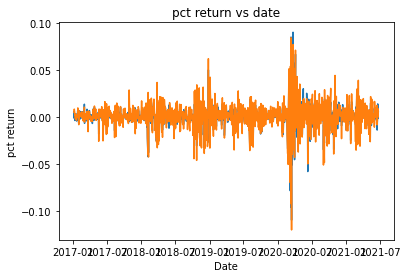

In [9]:
SPY=yf.download(['SPY'],'2016-12-31','2021-06-25')['Adj Close']
QQQ=yf.download(['QQQ'],'2016-12-31','2021-06-25')['Adj Close']
print(np.corrcoef(np.array(SPY),np.array(QQQ)))
spy=SPY.pct_change()
qqq=QQQ.pct_change()
#print(np.corrcoef(np.array(spy),np.array(qqq)))
print(np.shape(SPY))
print(np.shape(QQQ))

plt.plot(spy)
plt.plot(qqq)
plt.xlabel('Date')
plt.ylabel('pct return')
plt.title('pct return vs date')

pair=QQQ-SPY/2

In [3]:
|thing=(coint(SPY,QQQ))
print(thing)

(-2.5629273114050295, 0.2520429252559536, array([-3.90619282, -3.34156176, -3.04821875]))


Text(0.5, 1.0, 'Pair price vs date')

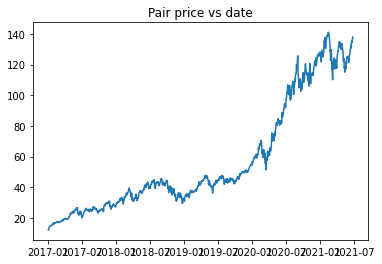

In [4]:
plt.plot(QQQ-SPY/2)
plt.title('Pair price vs date')

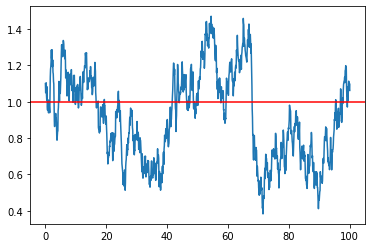

In [5]:
np.random.seed(123)
t=np.linspace(0,100,1127)
dt=t[1]-t[0]
theta=1
mu=0.2
sigma=0.15
X=np.zeros(t.shape)
X[0]=1.1

for i in range(t.size-1):
    # cox ingressol ross model one factor short rate nodel for interest rate derivatives
    #typcial ornstien uhlnbeck process for pairs trading
    X[i+1]=X[i]+mu*(theta-X[i])*dt+sigma*np.sqrt(dt)*np.random.normal()
    

plt.plot(t,X)
plt.axhline(y=1, color='r', linestyle='-')
# Note how the process reverts around the mean y=1


[[0.01776199]
 [0.03831965]
 [0.05811651]
 ...
 [0.78629597]
 [0.83852072]
 [0.        ]]


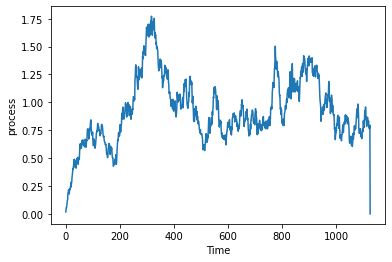

In [10]:
def OUpro(pair,mu,theta,sigma,t):
  X=np.zeros(t.size)
  X[0]=np.std(pair[1:]/pair[0:]-1)
  for i in range(t.size-1):
    X[i+1]=X[i]+mu*(theta-X[i])*dt+sigma*np.sqrt(dt)*np.random.normal()


  plt.plot(t,X)
  plt.axhline(y=theta, color='r', linestyle='-')

def CIRpro(pair,mu,theta,sigma,t,N):
  size=(N,t.size)
  Xy=np.zeros(size)
 
  X=np.std(pair[0:]/pair[1:])
  for i in range(t.size-1):
    WT=np.random.multivariate_normal(np.array([0,0]),cov=np.array([[1,0.7],
                                                             [0.7,1]]),size=N)
    X=X+mu*(theta-X)*dt+sigma*np.sqrt(X)*np.sqrt(dt)*WT[:,0]
    Xy[:,i]=X

  #plt.plot(t,X)
  #plt.axhline(y=theta, color='r', linestyle='-')
  return Xy


t=np.linspace(0,100,1127)
dt=t[1]-t[0]
theta=1
mu=0.2
sigma=0.15
#OUpro(pair,mu,theta,sigma,t)
plt.plot(CIRpro(pair,mu,theta,sigma,t,1).T)
plt.xlabel('Time')
plt.ylabel('process')
print(CIRpro(pair,mu,theta,sigma,t,1).T)



NameError: ignored

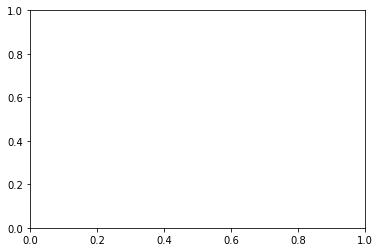

In [7]:
fix, ax= plt.subplots()
prices=CIRpro(pair,mu,theta,sigma,t,200)[:,-1]
ax=sns.kdeplot(data=prices,ax=ax) 

In [8]:


def OU(x1, x2, dt, theta, mu, sigma):
    sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)
    sigma0 = np.sqrt( sigma0 )
    
    prefactor = 1 / np.sqrt(2 * np.pi * sigma0**2)
    
    f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
                    theta * (1-np.exp(-mu*dt)) )**2 / (2 * sigma0**2) )
    
    return f

#  Calculate the negative of the log likelihood
def log_likelihood_OU(p, X, dt):
    
    theta = p[0]
    mu = p[1]
    sigma = p[2]
    
    N = X.size
    
    f = np.zeros( (N-1, ) )
    
    for i in range( 1, N ):
        x2 = X[i]
        x1 = X[i-1]
        
        f[i-1] = OU(x1, x2, dt, theta, mu, sigma)
    
    ind = np.where(f == 0)
    ind = ind[0]
    if ind.size > 0:
        f[ind] = 10**-8
        
    f = np.log(f)
    f = np.sum(f)
        
    return -f

#  mu and sigma must be greater than zero.  We use these contraint functions with minimze
def constraint1( p ):
    return p[1]

def constraint2( p ):
    return p[2]
cons = ( {'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2} )

#  Initial guess for our parameters
p0 = [1, 1, 1]

#  Call minimize
minimize(log_likelihood_OU, p0, args = (pair, dt), constraints=cons)

     fun: 2198.1899037237226
     jac: array([0.00000000e+00, 7.56489563e+01, 1.03149414e-02])
 message: 'Optimization terminated successfully.'
    nfev: 184
     nit: 34
    njev: 33
  status: 0
 success: True
       x: array([ 4.23682108e+01, -5.73120156e-11,  5.71961181e+00])

In [12]:

B_OVER=np.linspace(0.1,1,1000)
like=[]
for value in B_OVER:
  alpha=1/QQQ[0]
  beta=value/(SPY[0])
  pair=alpha*QQQ-beta*SPY
  res=minimize(log_likelihood_OU, p0, args = (pair, dt), constraints=cons)
  like.append(log_likelihood_OU([res.x[0],res.x[1],res.x[2]],pair,dt))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5

KeyboardInterrupt: ignored

In [ ]:
plt.plot(B_OVER,like)

In [ ]:
 print(like)

In [ ]:

def calcparam(X,dt):
    alpha=(len(X)**2-2*len(X)+1+np.sum(X[1:])*np.sum(1/X[0:])-np.sum(X[0:])*np.sum(1/X[0:])-(len(X)-1)*np.sum(X[1:]/X[0:]))/(dt*(len(X)**2)-2*len(X)+1-np.sum(X[0:])*np.sum(1/X[0:]))
    mu= ((len(X)-1)*np.sum(X[1:])- np.sum(X[1:]/X[0:])*np.sum(X[0:]))/(len(X)**2-2*len(X)+1+np.sum(X[1:])*np.sum(1/X[0:])-np.sum(X[0:])*np.sum(1/X[1:])-(len(X)-1)*np.sum(X[1:]/X[0:]))
    return alpha,mu


def bessel(X):
  return np.sin(X)/X**2 - np.cos(X)/X

def logCIR(alpha,X,c,dt):
  return 1127*np.log(c)-1 +np.sum(-c*X[0:]*np.exp(-alpha*dt))-np.sum(c*X[1:])+0.5*np.sum(np.log(c*X[1:]/c*X[0:]*np.exp(-alpha*dt)))+np.sum(np.log(bessel(2*((c*X[0:]*np.exp(-alpha*dt)*c*X[1:])**(1/2)))))

78.00990092777332 0.537297379926388
78.08324778310276 0.5370449663057367
78.15669660467236 0.5367925579249904
78.23024757892036 0.5365401547915439
78.30390089219667 0.5362877569128072
78.37765673157564 0.5360353642962014
78.45151528442872 0.5357829769491643
78.5254767389231 0.535530594879146
78.59954128289547 0.5352782180936109
78.67370910528874 0.5350258466000368
78.74798039521403 0.534773480405916
78.82235534218758 0.534521119518755
78.89683413629952 0.5342687639460741
78.97141696777187 0.5340164136954064
79.04610402752196 0.5337640687743018
79.1208955066569 0.5335117291903221


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


79.1957915973118 0.5332593949510438
79.27079249104601 0.5330070660640572
79.34589838096525 0.5327547425369686
79.42110945961706 0.5325024243773964
79.49642592080049 0.532250111592974
79.57184795811197 0.5319978041913499
79.64737576588978 0.5317455021801862
79.72300953903729 0.5314932055671593
79.79874947271875 0.5312409143599606
79.8745957623596 0.5309886285662946
79.9505486043598 0.5307363481938827
80.02660819500235 0.5304840732504584
80.10277473144286 0.5302318037437712
80.17904841082502 0.5299795396815844
80.25542943116827 0.5297272810716764
80.33191799070563 0.5294750279218405
80.40851428845757 0.529222780239884
80.48521852329323 0.5289705380336288
80.5620308951004 0.5287183013109127
80.6389516040639 0.5284660700795868
80.71598085042555 0.5282138443475185
80.79311883540252 0.5279616241225893
80.87036576052895 0.5277094094126952
80.9477218277716 0.5274572002257482
81.02518723941985 0.527204996569674
81.10276219861176 0.5269527984524146
81.18044690815462 0.5267006058819251
81.2582415

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


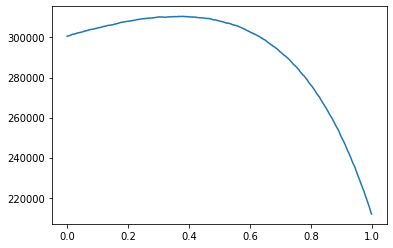

In [ ]:
B_OVER=np.linspace(0.001,1,1000)
like3=[]
for value in B_OVER:
  alphaa=1/QQQ[0]
  beta=(value)/SPY[0]
  pair=alphaa*QQQ-beta*SPY
  alpha,mu = calcparam(pair,dt)
  sigma=np.std(pair)
  c=2*alpha/(sigma**2 *(1-np.exp(-alpha*dt)))
  print(c,sigma)
  like3.append(-logCIR(alpha,pair,c,dt))
  #print(logCIR(alpha,pair,c,dt))
plt.plot(B_OVER,like3)


0.9906227831851435
5.301226592699118e-11


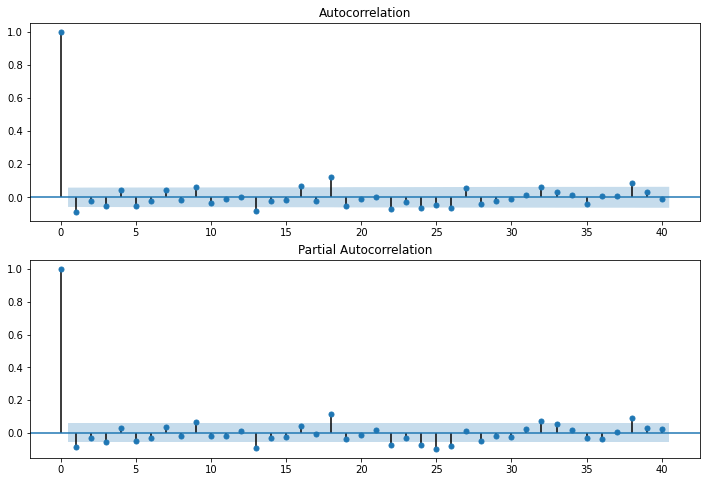

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
diffe=np.diff(pair)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(diffe, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diffe, lags=40, ax=ax2)
AdTest=adfuller(pair,autolag='AIC')
print(AdTest[1])

AdTest2=adfuller(diffe,autolag='AIC')
print(AdTest2[1])

In [ ]:
arma_20 = ARIMA(pair, order=(1, 1, 1)).fit()
arma_30 = ARIMA(pair, order=(18, 1, 18)).fit()
print(arma_20.aic)
print(arma_30.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

-6464.714938023793
-6502.842551152458


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
blrt=arma_20.predict(dynamic=True)
blrt2=arma_30.predict(dynamic=True)
print(blrt2.head())

Date
2017-01-31    0.000933
2017-02-01    0.004685
2017-02-02    0.003196
2017-02-03    0.005881
2017-02-06    0.000333
dtype: float64


In [ ]:
!pip install arch
from arch import arch_model


NameError: ignored

In [ ]:
am=arch_model(100*diffe, p=18, o=0,q=18,vol='EGARCH' ,dist='skewt')
res4=am.fit(update_freq=5)
print(res4)
forecasts=res4.forecast(horizon=5,reindex=False)
cond_var= forecasts.variance
print(cond_var)

Iteration:      4,   Func. Count:    172,   Neg. LLF: 1510.46416498475
Iteration:      8,   Func. Count:    345,   Neg. LLF: 1500.1020094992746
Iteration:     12,   Func. Count:    519,   Neg. LLF: 1494.9029458529021
Iteration:     16,   Func. Count:    691,   Neg. LLF: 1492.4471404413246
Iteration:     20,   Func. Count:    863,   Neg. LLF: 1489.288876597308
Iteration:     24,   Func. Count: 1.04e+03,   Neg. LLF: 1488.78042863301
Iteration:     28,   Func. Count: 1.21e+03,   Neg. LLF: 1488.692322976476
Iteration:     32,   Func. Count: 1.38e+03,   Neg. LLF: 1488.6916250324198
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1488.6916250324298
            Iterations: 32
            Function evaluations: 1376
            Gradient evaluations: 32
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:            

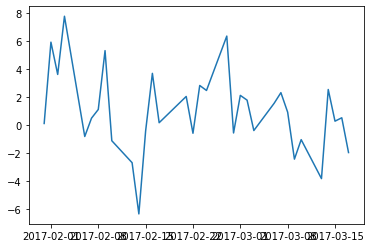

In [ ]:

yur=cond_var.iloc[0][:]
sig3=np.mean(yur[:])**2
z_score=(blrt2-blrt)/sig3
plt.plot(10000*z_score[:50])